Saving data_banknote_authentication.txt to data_banknote_authentication.txt


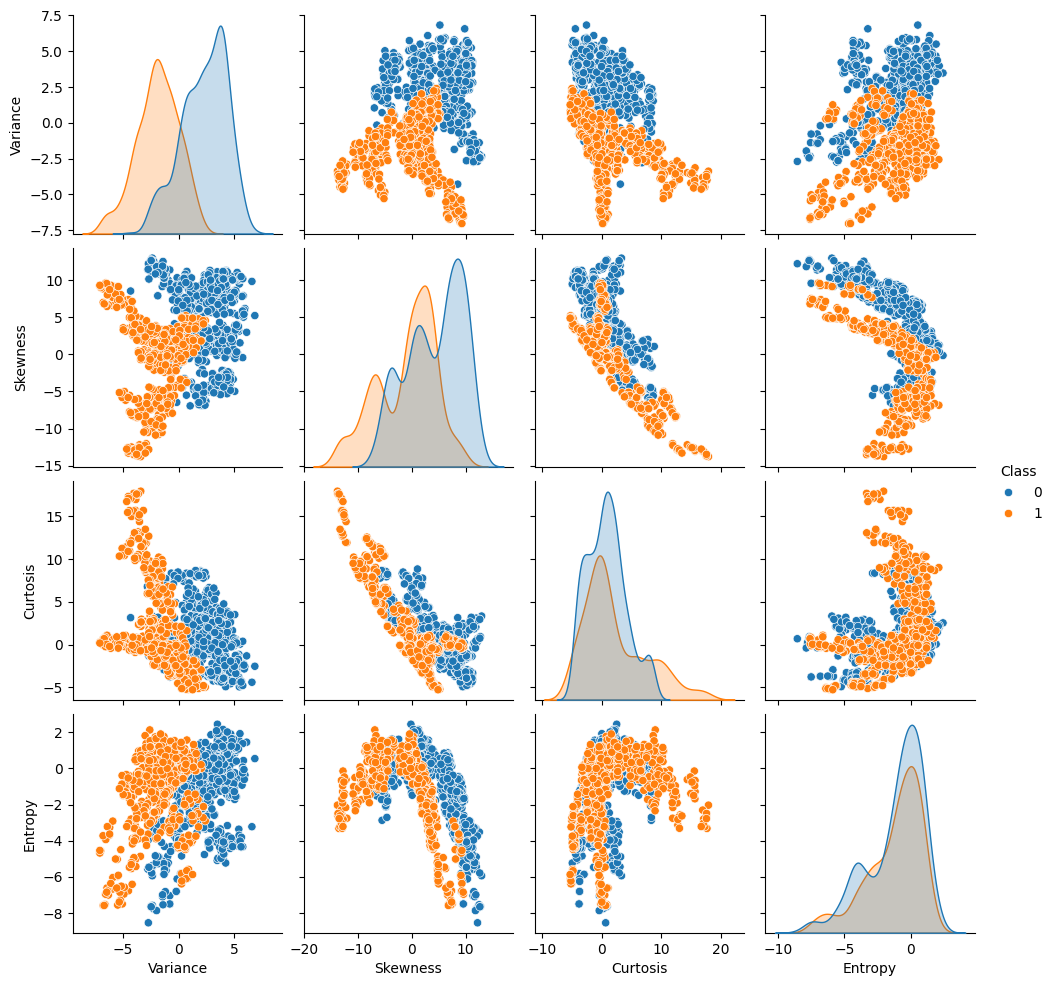

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Upload the dataset using the file upload feature in Colab
uploaded = files.upload()

# Get the filename from the uploaded file
file_name = list(uploaded.keys())[0]

# Load the dataset, using the uploaded filename
df = pd.read_csv(file_name, header=None)

# Add column names based on typical feature names for this dataset
df.columns = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']

# Check the first few rows of the dataset to confirm the loading
df.head()

# Create pairplot for the first 4 features, colored by the Class label
sns.pairplot(df, hue='Class')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       148
           1       1.00      0.93      0.96       127

    accuracy                           0.97       275
   macro avg       0.97      0.96      0.97       275
weighted avg       0.97      0.97      0.97       275



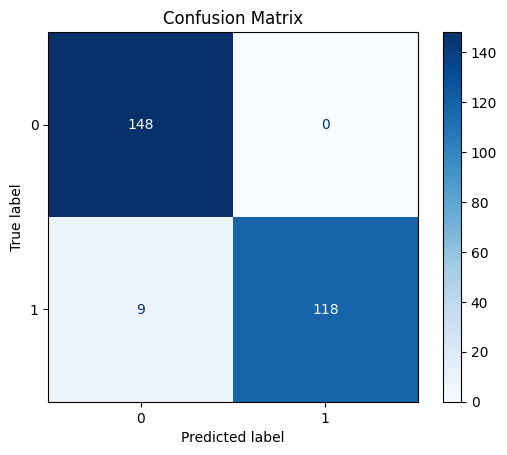

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

# Split the data into features (X) and labels (y)
X = df.drop(columns='Class')
y = df['Class']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Experiment with different hyperparameters (max_depth, min_samples_split, and criterion)
# Example: Using max_depth=5, min_samples_split=10, criterion="gini"
dt.set_params(max_depth=5, min_samples_split=10, criterion='gini')

# Train the model
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Evaluate the model: Print classification report (accuracy, precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


Classification Report with Entropy Criterion:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       148
           1       0.99      0.96      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



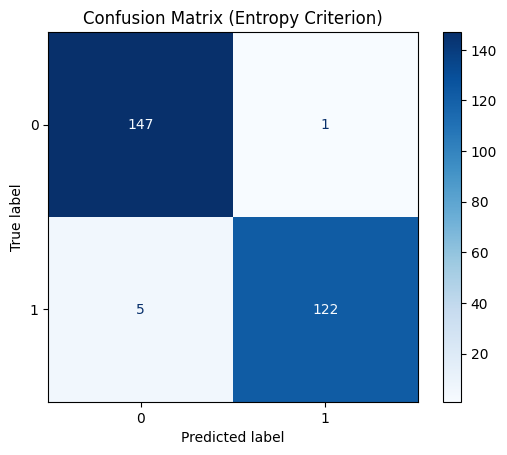

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

# Split the data into features (X) and labels (y)
X = df.drop(columns='Class')
y = df['Class']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Experiment with "entropy" criterion (as well as "gini") - you can switch between them
# Example: Using max_depth=5, min_samples_split=10, criterion="entropy"
dt.set_params(max_depth=5, min_samples_split=10, criterion='entropy')

# Train the model
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Evaluate the model: Print classification report (accuracy, precision, recall, F1-score)
print("Classification Report with Entropy Criterion:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix (Entropy Criterion)')
plt.show()


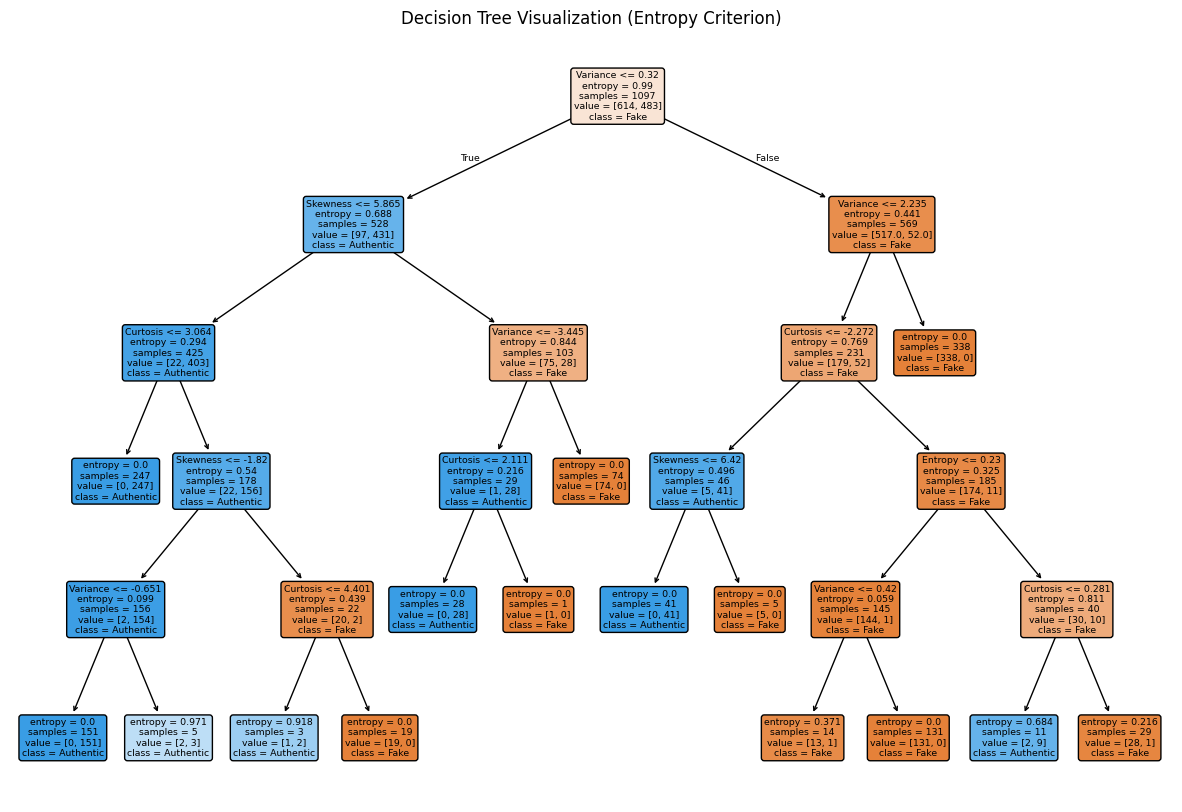

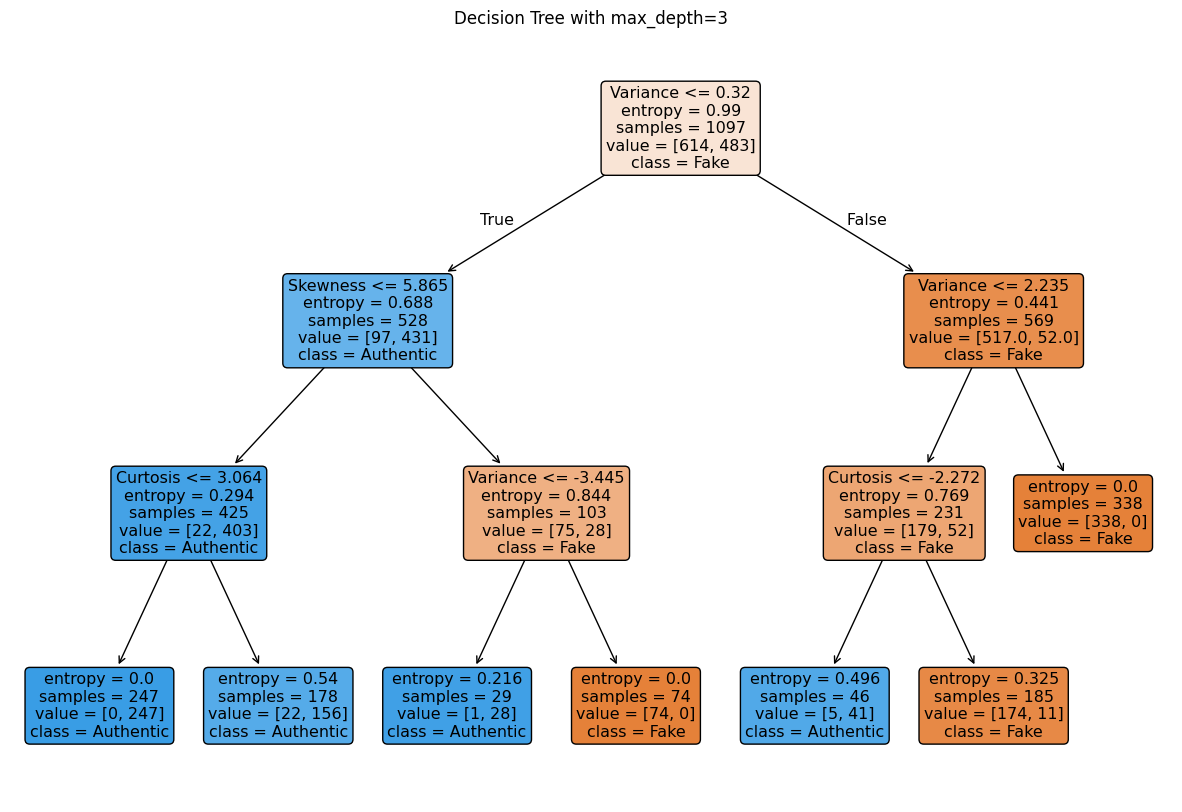

In [7]:
from sklearn.tree import plot_tree

# Visualize the Decision Tree using plot_tree() for "entropy" criterion
plt.figure(figsize=(15, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Fake', 'Authentic'], rounded=True)
plt.title("Decision Tree Visualization (Entropy Criterion)")
plt.show()

# Experiment with different depths and visualize the tree to analyze how depth affects interpretability
# For example, set max_depth=3 to limit the tree depth
dt.set_params(max_depth=3)  # Experiment with depth=3
dt.fit(X_train, y_train)

# Visualize the tree with max_depth=3
plt.figure(figsize=(15, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Fake', 'Authentic'], rounded=True)
plt.title("Decision Tree with max_depth=3")
plt.show()


<ipython-input-8-b86e75d59092>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


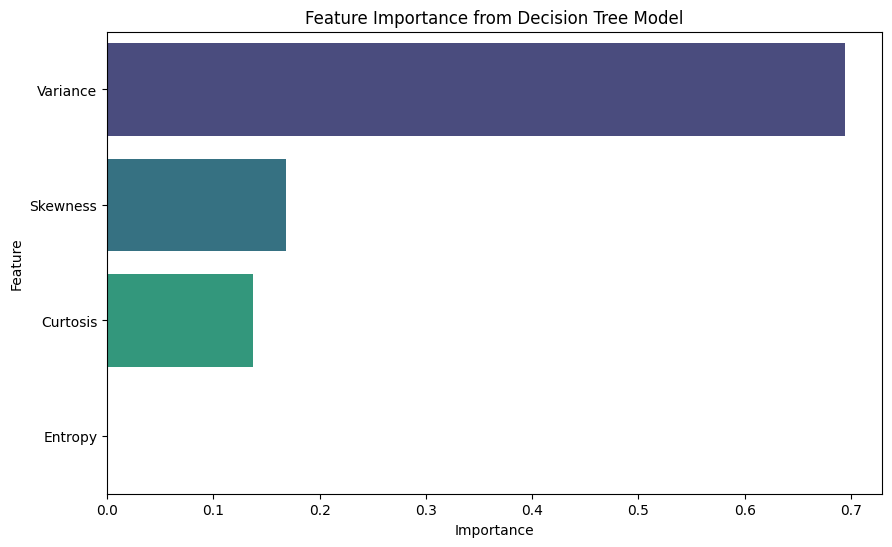

In [8]:
# Extract feature importance from the trained model
feature_importance = dt.feature_importances_

# Create a DataFrame to visualize the importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance from Decision Tree Model")
plt.show()
